[View in Colaboratory](https://colab.research.google.com/github/bipin1404/Big-Mart-Sales-Analysis/blob/master/Big_Mart_Sales_Analysis.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

# **Importing datasets**

In [2]:
data1=pd.read_csv("https://raw.githubusercontent.com/bipin1404/Big-Mart-Sales-Analysis/master/Big_mart.csv")

**Shape of Datasets**

In [3]:
data1.shape

(8523, 12)

**First 8 row of the Datasets**

In [4]:
data1.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


**Last 5 row of the Datasets**

In [5]:
data1.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
data1.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Description of all column in given Datasets**

In [6]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Some observations:

1. **Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. **Outlet_Establishment_Years** vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [11]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


**Data_Types of All Column**

In [12]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## **The goal of this project was to use EDA, visualization, data cleaning, preprocessing, and linear regression models to predict item_outlet_sales  given the features of the Big_mart datesets, and interpret your linear Regression models to find out what features add value to a big_mart analysis**

# **Data Description**

## **The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.Data are collected on 12 different properties of the big_mart sales analysis ,all data is on properties of the big_mart**

# **Attribute information**

information of all data of big_mart sales Datasets 
1. Item_identifier
2. Item_weight
3. Item_fat_content
4. Item_visibility
5. Item_type
6. Item _MRP
7. Outlet_Indetifier
8. Outlet_Establishment_year
9. Outlet_Size
10. Outlet_Location_type
11. Outlet_type
12. Item_outlet_sales 

# **Data cleaning on the datasets**

**This step typically involves imputing missing values and treating outliers. Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers**

**Checking total missing or Null values**

In [13]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item.**

**Data cleaning on column=Item_weight **

In [14]:
data1['Item_Weight']=data1.Item_Weight.fillna(data1.Item_Weight.mean())

In [15]:
data1.head(22)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [17]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**checking for missing value**

In [18]:
data1.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
data1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**By doing this we will put that value in missing place of particular column  which having highest  occupation in that column**

In [20]:
data1 = data1.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [21]:
data1.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


**After filing all missing place of the datasets,summation of all Null value will be zero**

In [22]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**isna function show that is there any missing value or not,if it is there it show True,otherwise false**

In [23]:
data1.isna().head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


# **EDA REPORT ON THE  BIG_MART DATASETS**

# UNIVARIATE ANALYSIS

**Uni means one. Univariate means one variable analysis. The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.**

**<1>Distplot on Item_wieght
The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).**


**Description about distplot of column=Item_Weight
<1>. This plot show that the Item_weight near 12.5 having more number of product
<2>. it also show that item_weight near 5 is having less number of product 

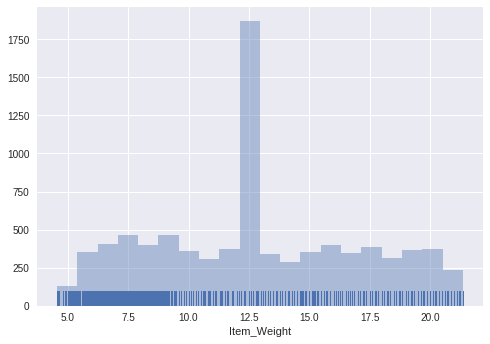

In [24]:
sns.distplot(data1['Item_Weight'],bins=20,rug=True,kde=False)
sns.despine()

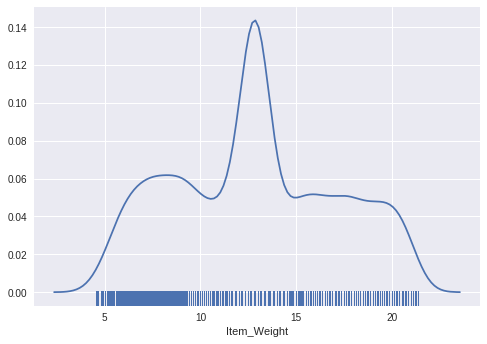

In [25]:
sns.distplot(data1['Item_Weight'],hist=False,rug=True)
sns.despine()

### **countplot on column=Item_Fat_content**

**Description about this plot**
<1> This plot show that whose item_fat_content is low fat having highest no of count
<2> There are few points which seem to be minor outliers as compare to other

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


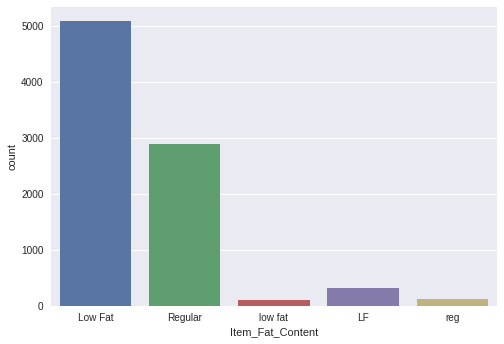

In [26]:
sns.countplot(x='Item_Fat_Content',data=data1)
sns.despine()

### **Kernel density estimaton(KDE)**
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

**kernel desnsity estimation plot on column=item_outlet_sales**

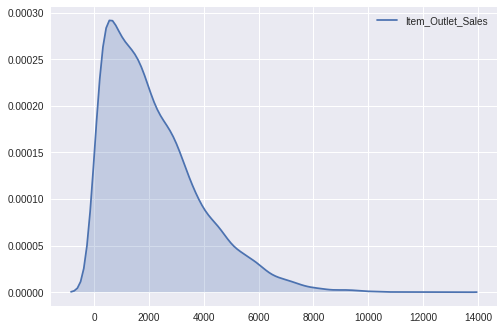

In [27]:
sns.kdeplot(data1['Item_Outlet_Sales'],shade=True)
sns.despine()

### **Value_count**=>Returns object containing counts of unique values.

In [28]:
data1['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

**some observation are**
1. year between 1990 to 1995 graph show less no of count
2.  it show highest no of count at 1985

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


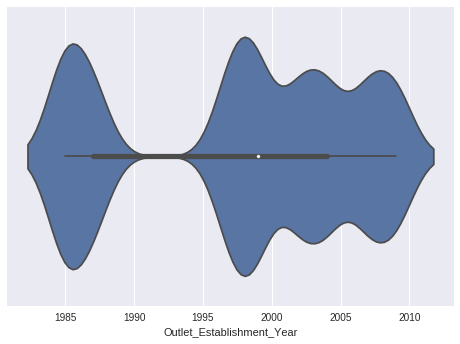

In [29]:
sns.violinplot(x='Outlet_Establishment_Year',data=data1)
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


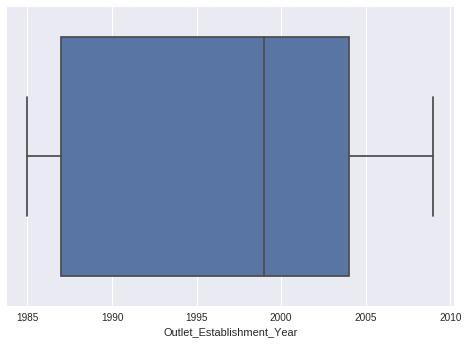

In [30]:
sns.boxplot(x='Outlet_Establishment_Year',data=data1)
sns.despine()

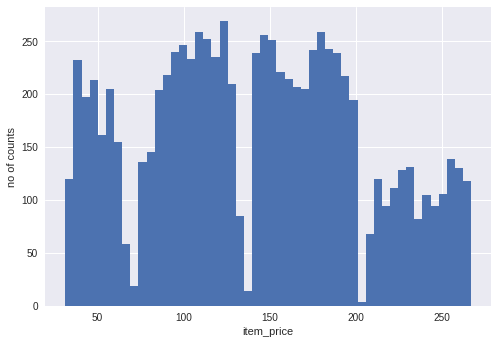

In [31]:
pl.hist(x='Item_MRP',data=data1,bins=50)
pl.xlabel('item_price')
pl.ylabel('no of counts')
pl.show()

**unique function** show the toatl no of unique object present in particular column or whole datasets

In [32]:
data1.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [33]:
data1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


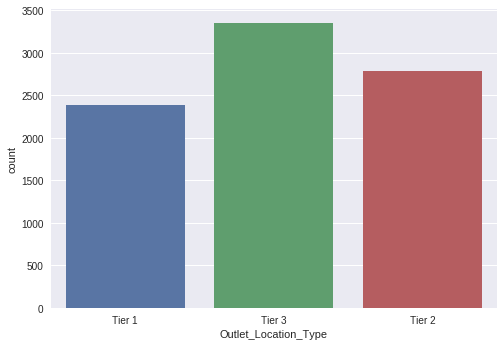

In [34]:
sns.countplot(data1.Outlet_Location_Type	,data=data1)
sns.despine()

(array([451., 472., 415., 158., 477., 576., 620., 628., 295., 509., 580.,
        518., 622., 578., 227., 253., 303., 254., 271., 316.]),
 array([ 31.29   ,  43.06992,  54.84984,  66.62976,  78.40968,  90.1896 ,
        101.96952, 113.74944, 125.52936, 137.30928, 149.0892 , 160.86912,
        172.64904, 184.42896, 196.20888, 207.9888 , 219.76872, 231.54864,
        243.32856, 255.10848, 266.8884 ]),
 <a list of 20 Patch objects>)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


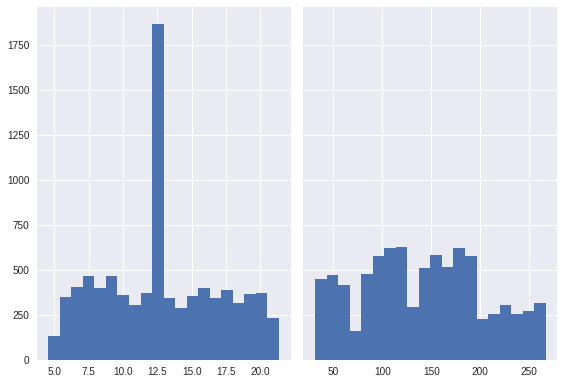

In [35]:
fig, axs = pl.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(data1['Item_Weight'], bins=20)
axs[1].hist(data1['Item_MRP'], bins=20)

# **Bivariate analysis**

**It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.**

In [36]:
data1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


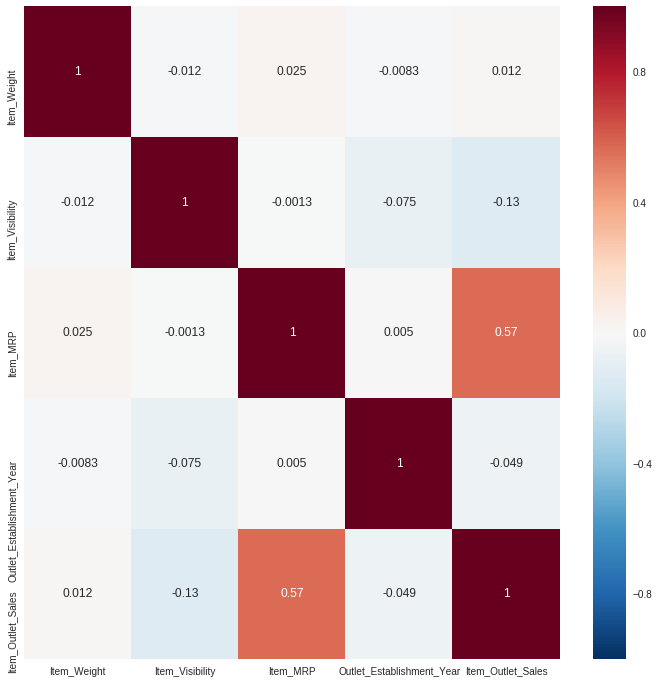

In [37]:
pl.figure(figsize =(12,12))
sns.heatmap(data1.corr(),annot=True)
pl.show()

**Relationship between item MRP and item outlet sales**

**some description about this**
1. correlation between Item_MRP and Item_Outlet_sales =0.57
2. some item having Item_mrp lies betwwen 200 to 250 have highest no of count of item_outlet_sales

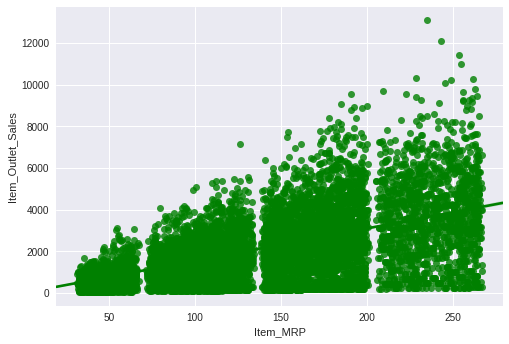

In [39]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=data1,color='g')
sns.despine()

**Jointplot**=>It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

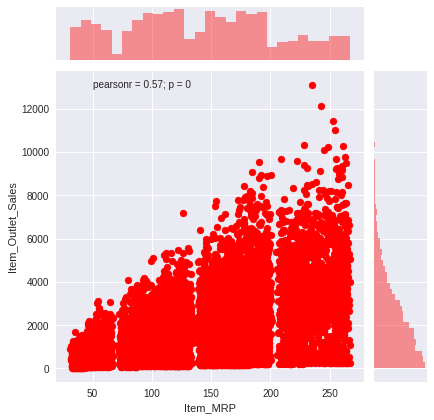

In [40]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=data1,color='r')
sns.despine()

**use of KDE in jointplot**=>It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

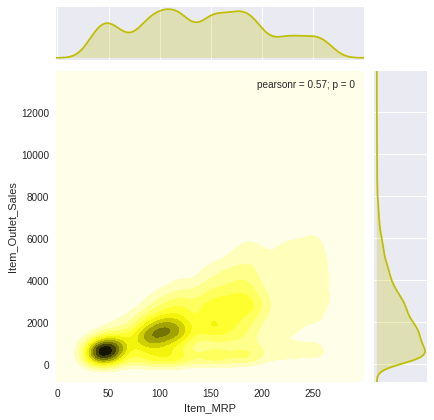

In [41]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=data1,kind='kde',color='y')
sns.despine()

**Scatterplots**=>
The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function,

**some observation are**
1. correlation between Item_visibility and Item_Outlet_sales=-0.13
2. There are few points which seem to be minor outliers

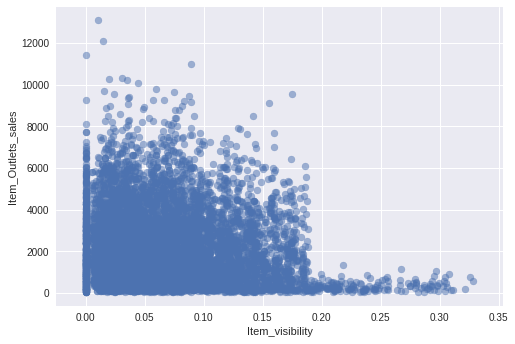

In [42]:
pl.scatter(data1.Item_Visibility, data1.Item_Outlet_Sales, alpha=.5)
pl.xlabel('Item_visibility')
pl.ylabel('Item_Outlets_sales')
pl.show()

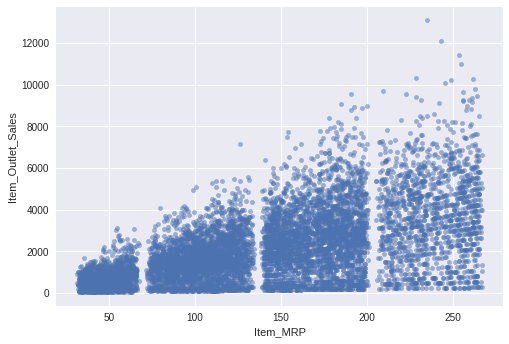

In [43]:
data1.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5)

In [44]:
data1.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

**we make particular objects for unique object of outlet_identifier column**

In [45]:
data_OUT049 = data1[data1.Outlet_Identifier == 'OUT049']
data_OUT018 = data1[data1.Outlet_Identifier == 'OUT018']
data_OUT010 = data1[data1.Outlet_Identifier == 'OUT010']
data_OUT013 = data1[data1.Outlet_Identifier == 'OUT013']
data_OUT027 = data1[data1.Outlet_Identifier == 'OUT027']
data_OUT045 = data1[data1.Outlet_Identifier == 'OUT045']
data_OUT017 = data1[data1.Outlet_Identifier == 'OUT017']
data_OUT035 = data1[data1.Outlet_Identifier == 'OUT035']
data_OUT019 = data1[data1.Outlet_Identifier == 'OUT019']
data_OUT046 = data1[data1.Outlet_Identifier == 'OUT046']

**Boxplot**=>A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

Text(0,0.5,'ITEM_OUTLET_SALES')

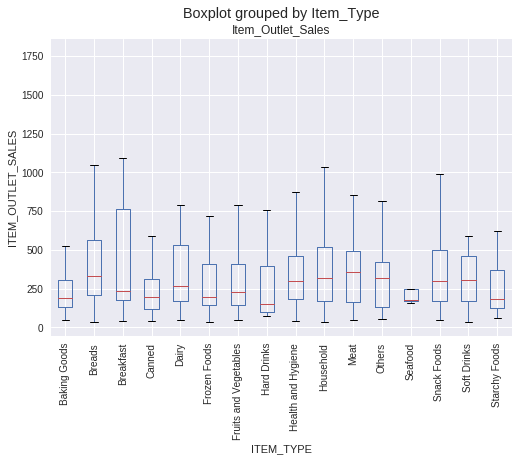

In [46]:
data_OUT010.boxplot(column='Item_Outlet_Sales', by='Item_Type')
pl.xticks(rotation=90);
pl.xlabel('ITEM_TYPE')
pl.ylabel('ITEM_OUTLET_SALES')

Text(0,0.5,'ITEM_OUTLET_SALES')

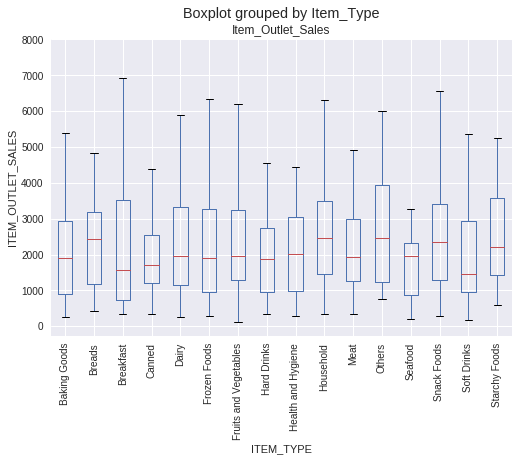

In [47]:
data_OUT049.boxplot(column='Item_Outlet_Sales', by='Item_Type')
pl.xticks(rotation=90);
pl.xlabel('ITEM_TYPE')
pl.ylabel('ITEM_OUTLET_SALES')

Text(0,0.5,'ITEM_MRP')

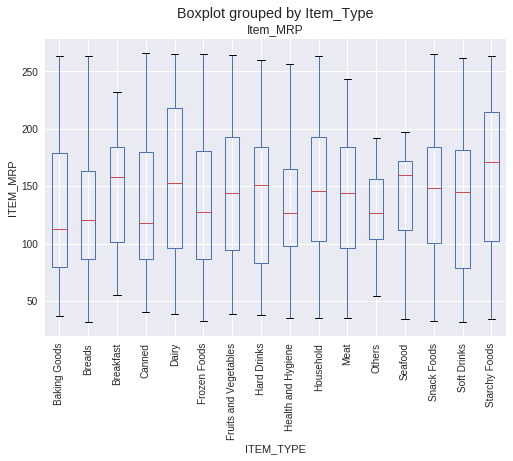

In [48]:
data_OUT013.boxplot(column='Item_MRP', by='Item_Type')
pl.xticks(rotation=90);
pl.xlabel('ITEM_TYPE')
pl.ylabel('ITEM_MRP')

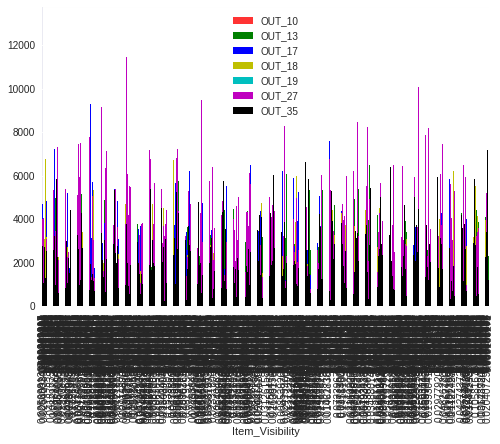

In [53]:
ax = data_OUT010.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='r', alpha=0.8, label='OUT_10')
data_OUT013.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='g', ax=ax, alpha=1, label='OUT_13')
data_OUT017.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='b', ax=ax, alpha=1, label='OUT_17')
data_OUT018.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='y', ax=ax, alpha=1, label='OUT_18')
data_OUT019.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='c', ax=ax, alpha=1, label='OUT_19')
data_OUT027.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='m', ax=ax, alpha=1, label='OUT_27')
data_OUT035.plot(kind='bar', x = 'Item_Visibility', y = 'Item_Outlet_Sales', color='k', ax=ax, alpha=1, label='OUT_35')
pl.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


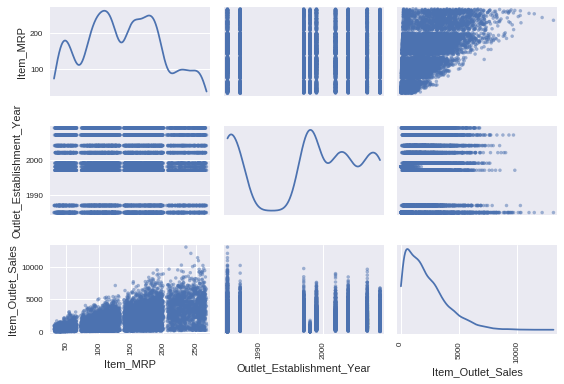

In [57]:
pd.tools.plotting.scatter_matrix(data1.loc[:, "Item_MRP":"Item_Outlet_Sales"], diagonal="kde")
pl.tight_layout()
pl.show()

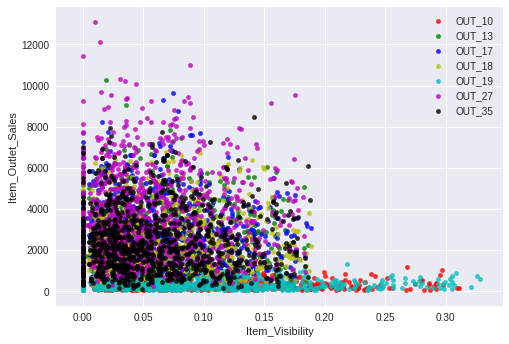

In [50]:
ax = data_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.8, label='OUT_10')
data_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.8, label='OUT_13')
data_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.8, label='OUT_17')
data_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.8, label='OUT_18')
data_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.8, label='OUT_19')
data_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.8, label='OUT_27')
data_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.8, label='OUT_35')
pl.legend(loc='best')

In [54]:
data1.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

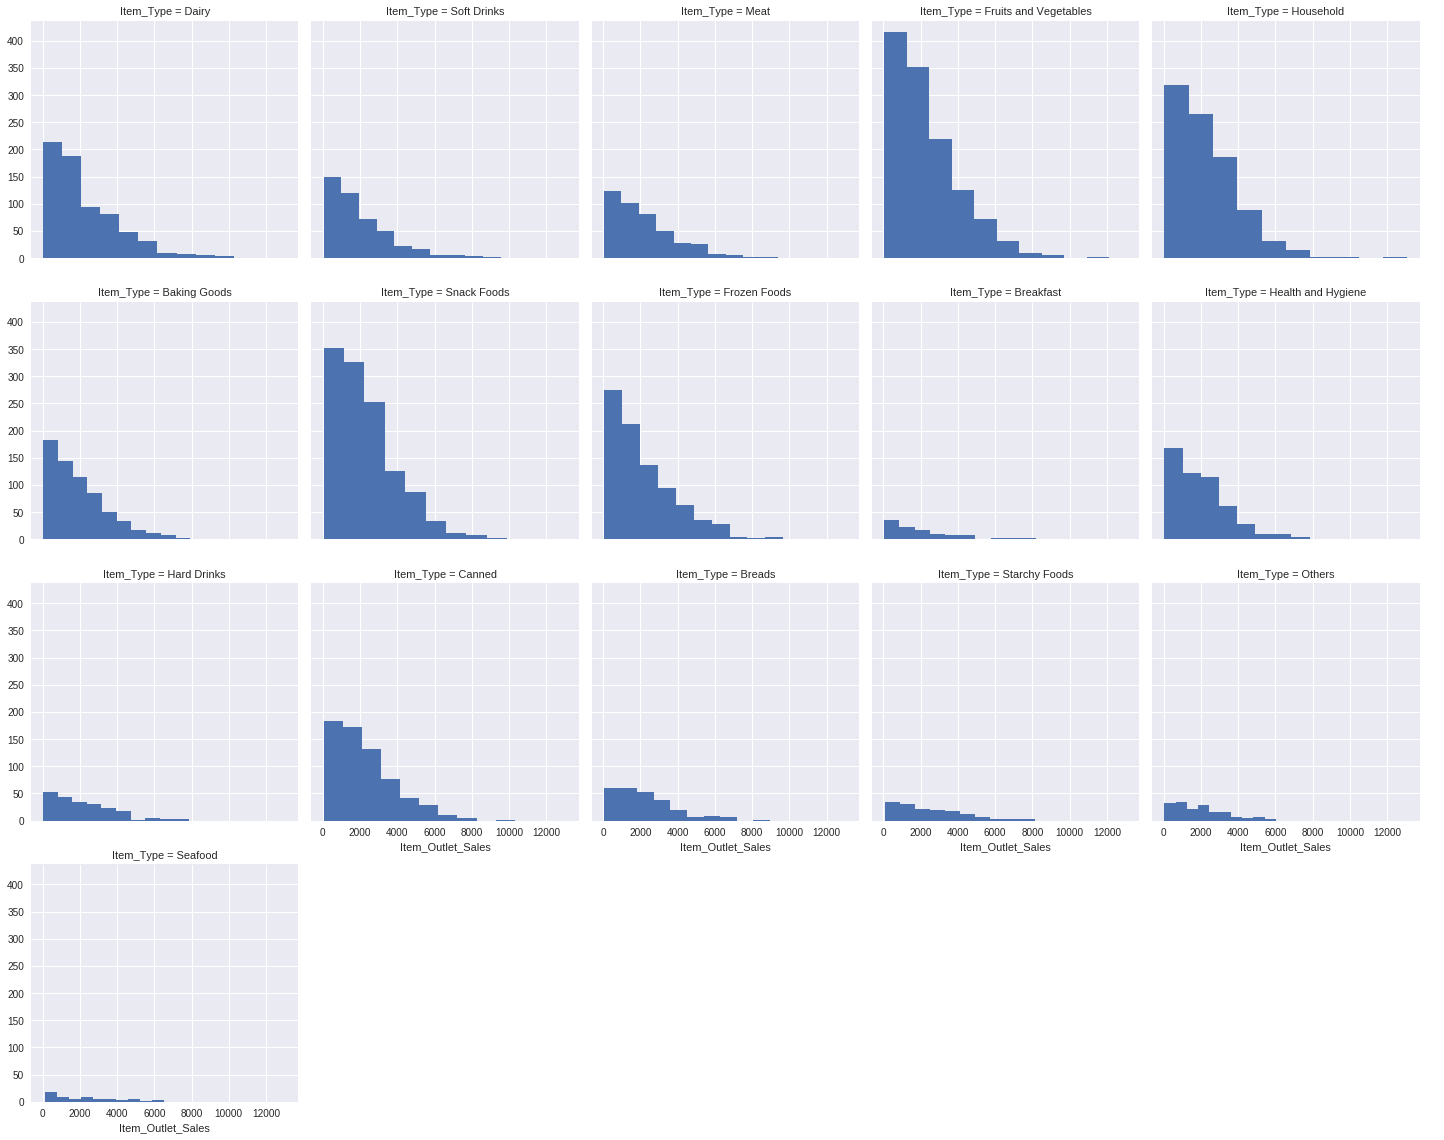

In [55]:
sns.FacetGrid(data1, col='Item_Type', size=4, col_wrap=5).map(pl.hist, 'Item_Outlet_Sales').add_legend()

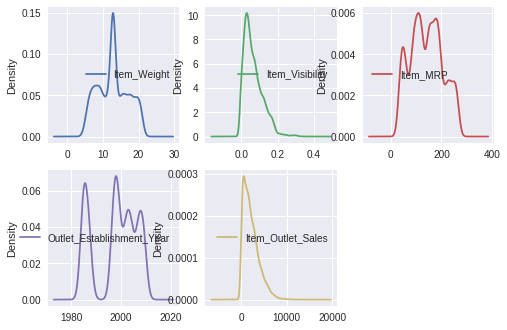

In [58]:
data1.plot(kind='density', subplots=True, layout=(2,3), sharex=False)
pl.show()

# **Multivariant analysis**

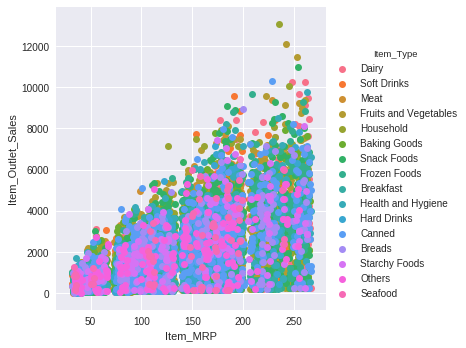

In [56]:
sns.lmplot(x = 'Item_MRP' , y = 'Item_Outlet_Sales' , hue='Item_Type',data=data1 ,scatter_kws={'alpha':1}, fit_reg = False)
sns.despine()

# **Feature Enginnering**

**We explored some mistake in the data in the data exploration section. Lets move on to resolving them and making our data ready for analysis. We will also create some new variables using the existing ones in this section**

In [59]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 **<1>Consider combining Outlet_Type**
During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store.

In [60]:
data1.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


**<2>Modify Item_Visibility**
We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [61]:
visibility_avg = data1.pivot_table(values='Item_Visibility', index='Item_Identifier')
missing = (data1['Item_Visibility'] == 0)

print("Number of 0 values initially=%d"%sum(missing))
data1.loc[missing,'Item_Visibility'] = data1.loc[missing,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
print('Number of 0 values after modification: %d'%sum(data1['Item_Visibility'] == 0))

Number of 0 values initially=526
Number of 0 values after modification: 0


In [53]:
data1['Item_Visibility_MeanRatio'] = data1.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)
print(data1['Item_Visibility_MeanRatio'].describe())

count    8523.000000
mean        1.061715
std         0.237149
min         0.678833
25%         0.903570
50%         1.000000
75%         1.055863
max         2.729420
Name: Item_Visibility_MeanRatio, dtype: float64


**<4> Create a broad category of Type of Item**
Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [62]:
data1['Item_Type_Combined'] = data1['Item_Identifier'].apply(lambda x: x[0:2])
data1['Item_Type_Combined'] = data1['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data1['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

**<5>Determine the years of operation of a store**
We wanted to make a new column depicting the years of operation of a store

In [63]:
data1['Outlet_Years'] = 2018 - data1['Outlet_Establishment_Year']
data1['Outlet_Years'].describe()

count    8523.000000
mean       20.168133
std         8.371760
min         9.000000
25%        14.000000
50%        19.000000
75%        31.000000
max        33.000000
Name: Outlet_Years, dtype: float64

**<6>Modify categories of Item_Fat_Content**
We found typos and difference in representation in categories of Item_Fat_Content variable.

In [64]:
print('Original Categories:')
print(data1['Item_Fat_Content'].value_counts())

print('\nModataifiedata Categories:')
data1['Item_Fat_Content'] = data1['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data1['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modataifiedata Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [65]:
data1.loc[data1['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data1['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data1['Outlet'] = le.fit_transform(data1['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data1[i] = le.fit_transform(data1[i])

In [67]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Item_Type_Combined             int64
Outlet_Years                   int64
Outlet                         int64
dtype: object

In [68]:
data1 = pd.get_dummies(data1, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [69]:
data1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,19,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,9,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,19,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,20,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.008082,Household,53.8614,OUT013,1987,994.7052,31,0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [71]:
data1.shape

(8523, 35)

In [72]:
data1.drop(['Item_Identifier','Item_Type','Outlet_Identifier',],axis=1,inplace=True)

In [74]:
data1.shape

(8523, 32)

# **LinearRegression and Spliting of the Datasets**

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [76]:
print(data1.shape)

(8523, 32)


In [77]:
data1.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
O

In [78]:
y=data1['Item_Outlet_Sales']
data=data1.drop(columns=['Item_Outlet_Sales'],axis=1)
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1999,19,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,9,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,19,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.015274,182.0950,1998,20,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.008082,53.8614,1987,31,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [79]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=44)
mod=reg.fit(x_train,y_train)
mod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## **Accuracy of the Model**

In [87]:
print("accuracy of model")
print("score=",mod.score(x_test,y_test))

accuracy of model
score= 0.5681561178548034


In [80]:
data.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
Outlet_3                       uint8
Outlet_4                       uint8
Outlet_5                       uint8
O

# **GradientBoostingregression and Randomforestregression**

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection


In [82]:
kfold = model_selection.KFold(n_splits=10, random_state=17)
model = RandomForestRegressor(n_estimators=50, max_features=5)
results = model_selection.cross_val_score(model, data, y, cv=kfold)
print(results.mean())

0.5364287467679381


In [83]:
kfold = model_selection.KFold(n_splits=10, random_state=17)
model = GradientBoostingRegressor(n_estimators=80, random_state=17)
results1 = model_selection.cross_val_score(model, data, y, cv=kfold)
print(results1.mean())

0.5948656770131233


In [85]:
pred=reg.predict(x_test)
from sklearn import metrics

## **mean absolute error**

In [87]:
print("mean absolute error=",metrics.mean_absolute_error(y_test,pred))

mean absolute error= 809.3451092082112


## **mean squared error**

In [89]:
print("mean squared error=",metrics.mean_squared_error(y_test,pred))

mean squared error= 1164948.0463738567


## **Root mean squared error**

In [90]:
print("root mean sqaured error=",np.sqrt(metrics.mean_squared_error(y_test,pred)))

root mean sqaured error= 1079.3275899252537
